In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df_customers = pd.read_csv('olist_customers_dataset.csv')
df_geolocation = pd.read_csv('olist_geolocation_dataset.csv')
df_order_items = pd.read_csv('olist_order_items_dataset.csv')
df_order_payments = pd.read_csv('olist_order_payments_dataset.csv')
df_review = pd.read_csv('olist_order_reviews_dataset.csv')
df_orders = pd.read_csv('olist_orders_dataset.csv')
df_products = pd.read_csv('olist_products_dataset.csv')
df_sellers = pd.read_csv('olist_sellers_dataset.csv')
df_category = pd.read_csv('product_category_name_translation.csv')

# Nombre de produits dans les commandes

In [2]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [3]:
df_order_items['order_id'].value_counts()

8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
5a0911d70c1f85d3bed0df1bf693a6dd     1
5a082b558a3798d3e36d93bfa8ca1eae     1
5a07264682e0b8fbb3f166edbbffc6e8     1
5a071192a28951b76774e5a760c8c9b7     1
fffe41c64501cc87c801fd61db3f6244     1
Name: order_id, Length: 98666, dtype: int64

In [4]:
df_order_items[df_order_items['order_id']
               == 'c88b1d1b157a9999ce368f218a407141']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
88316,c88b1d1b157a9999ce368f218a407141,1,b1acb7e8152c90c9619897753a75c973,cc419e0650a3c5ba77189a1882b7556a,2017-07-26 22:50:12,34.99,7.78


In [5]:
nbre_items = df_order_items.groupby('order_id').agg(
    {'order_item_id': lambda x: x.max()})
nbre_items.describe()

,order_item_id
count,98666.000000
mean,1.141731
std,0.538452
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,21.000000


# Data set des clients (frequency)

In [6]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
df_customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [8]:
df_customers['customer_id'].duplicated().sum()

0

In [9]:
len(df_customers['customer_id'].unique())

99441

In [10]:
len(df_customers['customer_unique_id'].unique())

96096

In [11]:
1-(len(df_customers['customer_unique_id'].unique()) /
   len(df_customers['customer_id'].unique()))

0.033638036624732304

In [12]:
df_customers.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [13]:
df_customers = df_customers.drop(
    columns=['customer_zip_code_prefix', 'customer_city', 'customer_state'])

In [14]:
df_customers.shape

(99441, 2)

# Jeu de donnees des commandes

In [15]:
df_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [16]:
df_order_payments.shape

(103886, 5)

In [17]:
df_order_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [18]:
df_order_payments['order_id'].value_counts()

fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
285c2e15bebd4ac83635ccc563dc71f4    22
895ab968e7bb0d5659d16cd74cd1650c    21
fedcd9f7ccdc8cba3a18defedd1a5547    19
                                    ..
6d2a30c9b7dcee3ed507dc9a601f99e7     1
a7737f6d9208dd56ea498a322ed3c37f     1
646e62df54f3e236eb6d5ff3b31429b8     1
e115da7a49ec2acf622e1f31da65cfb9     1
28bbae6599b09d39ca406b747b6632b1     1
Name: order_id, Length: 99440, dtype: int64

In [19]:
df_order_payments['payment_installments'].describe()

count    103886.000000
mean          2.853349
std           2.687051
min           0.000000
25%           1.000000
50%           1.000000
75%           4.000000
max          24.000000
Name: payment_installments, dtype: float64

In [20]:
df_order_payments[df_order_payments['order_id'].duplicated()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
1456,683bf306149bb869980b68d48a1bd6ab,1,credit_card,1,8.58
2324,e6a66a8350bb88497954d37688ab123e,2,voucher,1,10.51
2393,8e5148bee82a7e42c5f9ba76161dc51a,1,credit_card,1,0.67
2414,816ccd9d21435796e8ffa9802b2a782f,1,credit_card,1,5.65
2497,2cbcb371aee438c59b722a21d83597e0,2,voucher,1,7.80
...,...,...,...,...,...
103778,fd86c80924b4be8fb7f58c4ecc680dae,1,credit_card,1,76.10
103817,6d4616de4341417e17978fe57aec1c46,1,credit_card,1,19.18
103860,31bc09fdbd701a7a4f9b55b5955b8687,6,voucher,1,77.99
103869,c9b01bef18eb84888f0fd071b8413b38,1,credit_card,6,238.16


## Groupement des paiment de commandes (monetary)

In [21]:
payment = df_order_payments.groupby('order_id').agg({'payment_value': lambda x: x.sum(
), 'payment_installments': lambda x: x.max()})

In [22]:
payment.shape

(99440, 2)

In [23]:
payment.head()

,payment_value,payment_installments
order_id,,
00010242fe8c5a6d1ba2dd792cb16214,72.19,2
00018f77f2f0320c557190d7a144bdd3,259.83,3
000229ec398224ef6ca0657da4fc703e,216.87,5
00024acbcdf0a6daa1e931b038114c75,25.78,2
00042b26cf59d7ce69dfabb4e55b4fd9,218.04,3


In [24]:
payment .shape

(99440, 2)

# Information sur les dates de livraison (Recency)

In [25]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [26]:
df_orders.shape

(99441, 8)

In [27]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [28]:
len(df_orders['order_id'].unique())

99441

In [29]:
len(df_orders['customer_id'].unique())

99441

In [30]:
from datetime import datetime as dt
from datetime import timedelta as td
df_orders['order_purchase_timestamp'] = pd.to_datetime(
    df_orders['order_purchase_timestamp'], format="%Y-%m-%d %H:%M:%S").dt.date
df_orders['order_approved_at'] = pd.to_datetime(
    df_orders['order_approved_at']).dt.date
df_orders['order_delivered_carrier_date'] = pd.to_datetime(
    df_orders['order_delivered_carrier_date']).dt.date
df_orders['order_delivered_customer_date'] = pd.to_datetime(
    df_orders['order_delivered_customer_date']).dt.date
df_orders['order_estimated_delivery_date'] = pd.to_datetime(
    df_orders['order_estimated_delivery_date'], format="%Y-%m-%d %H:%M:%S").dt.date

In [31]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

# Jeu de donnes sur les reviews

In [32]:
df_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [33]:
len(df_review['order_id'].unique())

98673

In [34]:
df_review.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [35]:
df_review.shape

(99224, 7)

In [36]:
df_review['order_id'].value_counts(ascending=False)

c88b1d1b157a9999ce368f218a407141    3
8e17072ec97ce29f0e1f111e598b0c85    3
df56136b8031ecd28e200bb18e6ddb2e    3
03c939fd7fd3b38f8485a0f95798f1f6    3
5cb890a68b91b6158d69257e4e2bc359    2
                                   ..
5b4e9a12d219f34f5c2de9f8d620b19d    1
a6da096d974acc000962856d7386448a    1
75e0647c26de647eca3421e9cc66c9da    1
bad0467c52f23cdc71e9fa139d4a8afd    1
90531360ecb1eec2a1fbb265a0db0508    1
Name: order_id, Length: 98673, dtype: int64

In [37]:
df_review[df_review['order_id'] == 'c88b1d1b157a9999ce368f218a407141']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1985,ffb8cff872a625632ac983eb1f88843c,c88b1d1b157a9999ce368f218a407141,3,NaN,NaN,2017-07-22 00:00:00,2017-07-26 13:41:07
82525,202b5f44d09cd3cfc0d6bd12f01b044c,c88b1d1b157a9999ce368f218a407141,5,NaN,NaN,2017-07-22 00:00:00,2017-07-26 13:40:22
89360,fb96ea2ef8cce1c888f4d45c8e22b793,c88b1d1b157a9999ce368f218a407141,5,NaN,NaN,2017-07-21 00:00:00,2017-07-26 13:45:15


In [38]:
df_review = df_review.drop_duplicates(subset='order_id')
df_review.shape

(98673, 7)

In [39]:
len(df_review['order_id'].unique())

98673

# Merge des datasets

In [40]:
df = df_orders.merge(df_customers, how='inner', on='customer_id')
df.shape

(99441, 9)

In [41]:
df = df.merge(payment, how='inner', on='order_id')

In [42]:
df.shape

(99440, 11)

In [43]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,payment_value,payment_installments
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,38.71,1
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13,af07308b275d755c9edb36a90c618231,141.46,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,179.12,3
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18,2017-11-22,2017-12-02,2017-12-15,7c142cf63193a1473d2e66489a9ae977,72.20,1
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13,2018-02-14,2018-02-16,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,28.62,1


In [44]:
df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
customer_unique_id                  0
payment_value                       0
payment_installments                0
dtype: int64

In [45]:
df = df.merge(df_review, how='inner', on='order_id')
df.shape

(98672, 17)

In [46]:
df = df.merge(nbre_items, how='inner', on='order_id')

In [47]:
df.isna().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   14
order_delivered_carrier_date       991
order_delivered_customer_date     2087
order_estimated_delivery_date        0
customer_unique_id                   0
payment_value                        0
payment_installments                 0
review_id                            0
review_score                         0
review_comment_title             86454
review_comment_message           57655
review_creation_date                 0
review_answer_timestamp              0
order_item_id                        0
dtype: int64

In [49]:
df.to_csv('raw_data.csv', index=False)

In [50]:
date = df['order_purchase_timestamp'].max()

In [51]:
latest_date = date + td(days=1)
latest_date

datetime.date(2018, 9, 4)

In [67]:
rfm_plus = df.groupby('customer_unique_id').agg(
    {'order_purchase_timestamp': lambda x: (latest_date - x.max()),
     'order_id': lambda x: x.count(),
     'payment_value': lambda x: x.sum(),
     'payment_installments': lambda x: x.mean(),
     'review_score': lambda x: x.mean(),
     'order_item_id': lambda x: x.sum()})

In [68]:
rfm_plus = rfm_plus.rename(columns={'order_purchase_timestamp': 'recency',
                                    'order_id': 'frequency', 'payment_value': 'monetary', 'order_item_id': 'nbre_of_items'})

In [69]:
rfm_plus['recency'] = rfm_plus['recency'].dt.days

In [71]:
rfm_plus.head()

,recency,frequency,monetary,payment_installments,review_score,nbre_of_items
customer_unique_id,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,117,1,141.90,8.0,5.0,1
0000b849f77a49e4a4ce2b2a4ca5be3f,120,1,27.19,1.0,4.0,1
0000f46a3911fa3c0805444483337064,543,1,86.22,8.0,3.0,1
0000f6ccb0745a6a4b88665a16c9f078,327,1,43.62,4.0,4.0,1
0004aac84e0df4da2b147fca70cf8255,294,1,196.89,6.0,5.0,1


In [56]:
rfm_plus.dtypes

recency                   int64
frequency                 int64
monetary                float64
payment_installments    float64
review_score            float64
nbre_of_items             int64
dtype: object

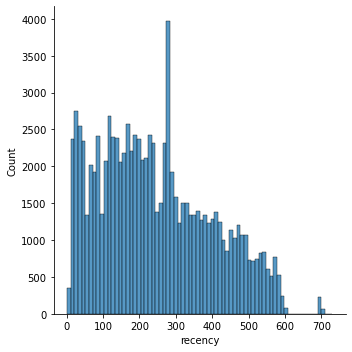

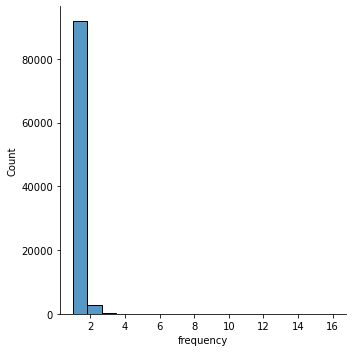

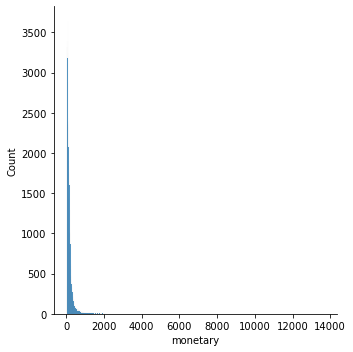

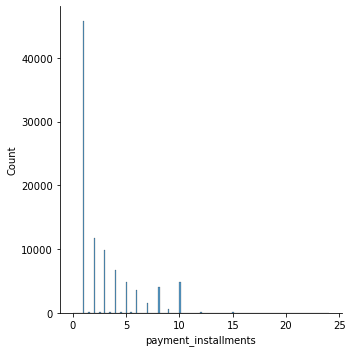

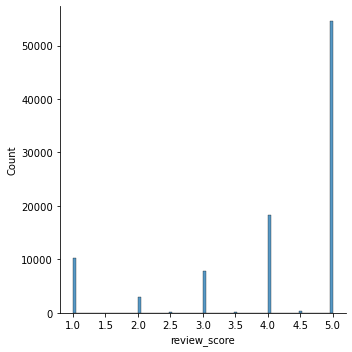

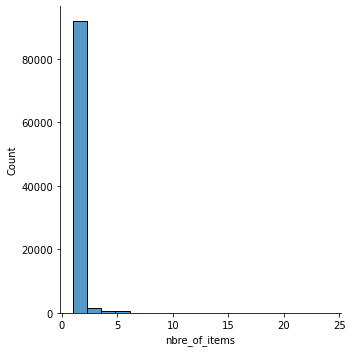

In [57]:
for indic in rfm_plus.columns:
    sns.displot(rfm_plus, x=indic)
    plt.show()

In [58]:
normal = ['recency', 'review_score']
skewed = ['frequency', 'monetary', 'payment_installments', 'nbre_of_items']

In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
log_pipeline = Pipeline(steps=[('transformer', FunctionTransformer(
    np.log1p)), ('scaler', StandardScaler())])
full_pipeline = ColumnTransformer(
    [('normal', StandardScaler(), normal), ('skewed', log_pipeline, skewed)])

In [60]:
full_pipeline.fit(rfm_plus)

ColumnTransformer(transformers=[('normal', StandardScaler(),
                                 ['recency', 'review_score']),
                                ('skewed',
                                 Pipeline(steps=[('transformer',
                                                  FunctionTransformer(func=<ufunc 'log1p'>)),
                                                 ('scaler', StandardScaler())]),
                                 ['frequency', 'monetary',
                                  'payment_installments', 'nbre_of_items'])])

In [61]:
rfm_plus_scaled = full_pipeline.transform(rfm_plus)

In [62]:
col = np.concatenate((normal, skewed), axis=0, out=None,
                     dtype=None, casting="same_kind")

In [63]:
rfm_plus_scaled = pd.DataFrame(rfm_plus_scaled, columns=col)

In [64]:
rfm_plus.to_csv('rfm_plus.csv', index=False)

In [65]:
rfm_plus_scaled.to_csv('rfm_plus_scaled.csv', index=False)

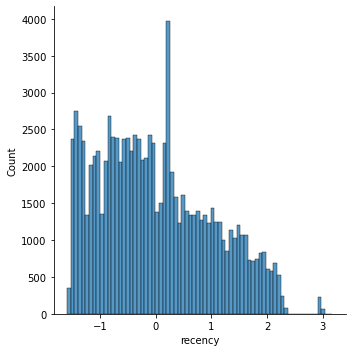

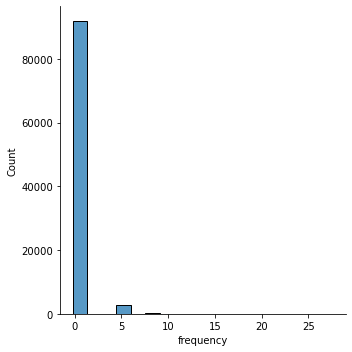

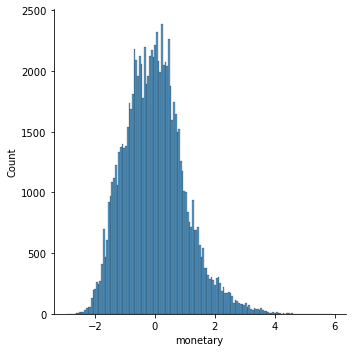

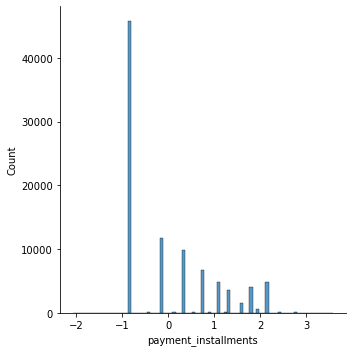

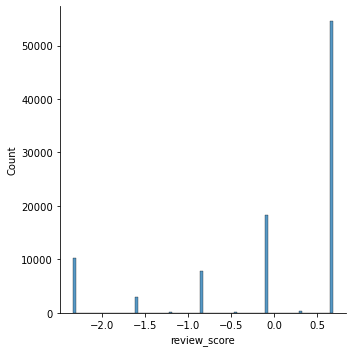

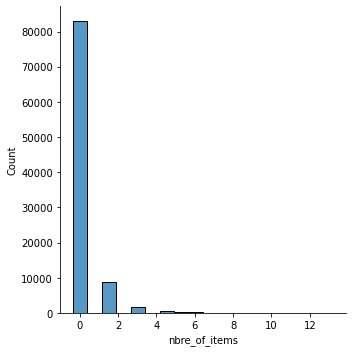

In [66]:
for indic in rfm_plus.columns:
    sns.displot(rfm_plus_scaled, x=indic)
    plt.show()